# Claims Data Classification

## Introduction
This project aims to analyze insurance claims data to identify patterns and build predictive models. The dataset includes various features such as age, BMI, and charges. The goal is to classify whether a claim is given or not.

## Data Loading and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('claims_data.csv')

# Display the first few rows of the dataset
df.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.900,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.770,3008,1,no,southeast,yes,1725.5523
2,28,male,33.000,3009,3,no,southeast,no,0.0000
3,33,male,22.705,10009,0,no,northwest,no,0.0000
4,32,male,28.880,8010,0,no,northwest,yes,3866.8552


In [2]:
# Check for missing values
df.isnull().sum()

age                0
sex                0
bmi                0
steps              0
children           0
smoker             0
region             0
insurance_claim    0
claim_amount       0
dtype: int64

### Exploratory Data Analysis(EDA)

In [3]:
# Summary statistics
df.describe()

,age,bmi,steps,children,claim_amount
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,5328.623318,1.094918,9611.312287
std,14.049960,6.098187,2453.643236,1.205493,13450.624483
min,18.000000,15.960000,3000.000000,0.000000,0.000000
25%,27.000000,26.296250,3008.000000,0.000000,0.000000
50%,39.000000,30.400000,4007.000000,1.000000,2748.484475
75%,51.000000,34.693750,8004.000000,2.000000,13045.979513
max,64.000000,53.130000,10010.000000,5.000000,63770.428010


In [4]:
# Proportion of Overweight Individuals
n_obese = df[df['bmi'] > 25].shape[0]
n_total = df.shape[0]
pct_obese = n_obese / n_total * 100
print(f'Proportion of overweight or obese individuals: {round(pct_obese, 2)}%')

Proportion of overweight or obese individuals: 81.54%


### Visualisations

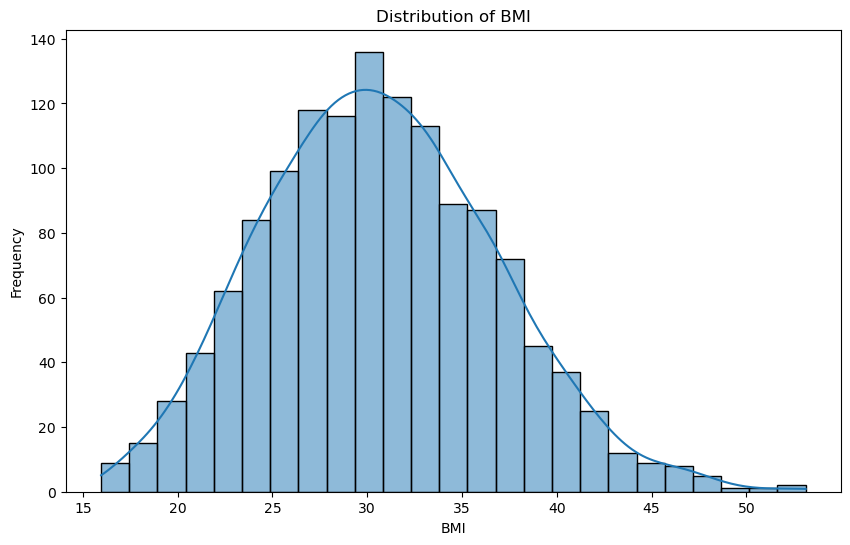

In [5]:
# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

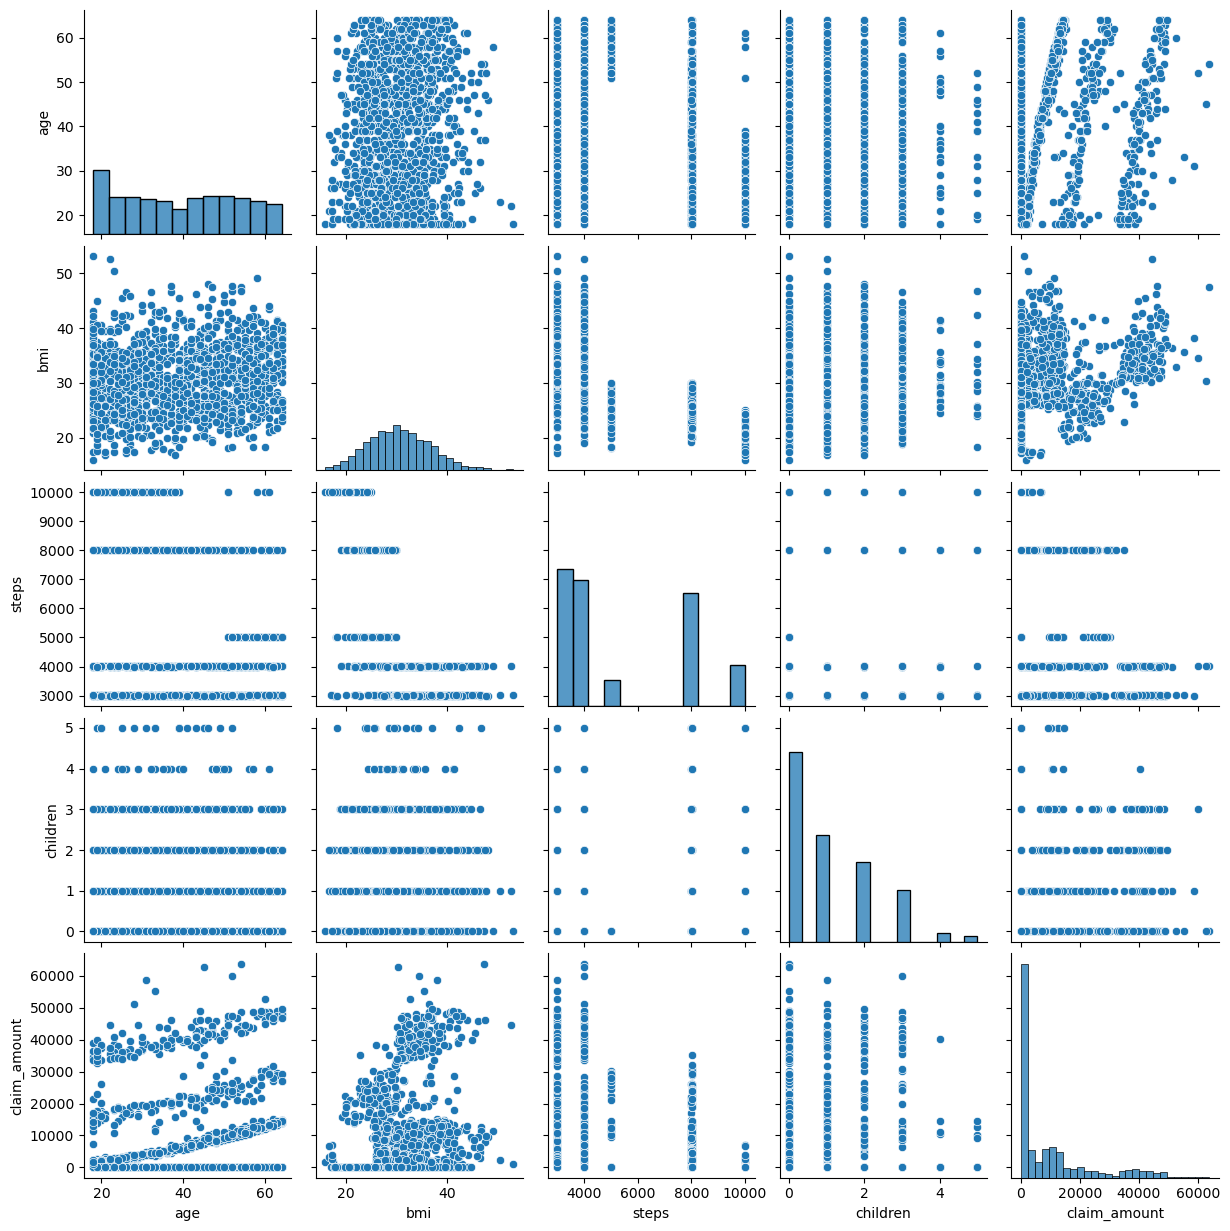

In [6]:
# Pairplot of the dataset
sns.pairplot(df)
plt.show()

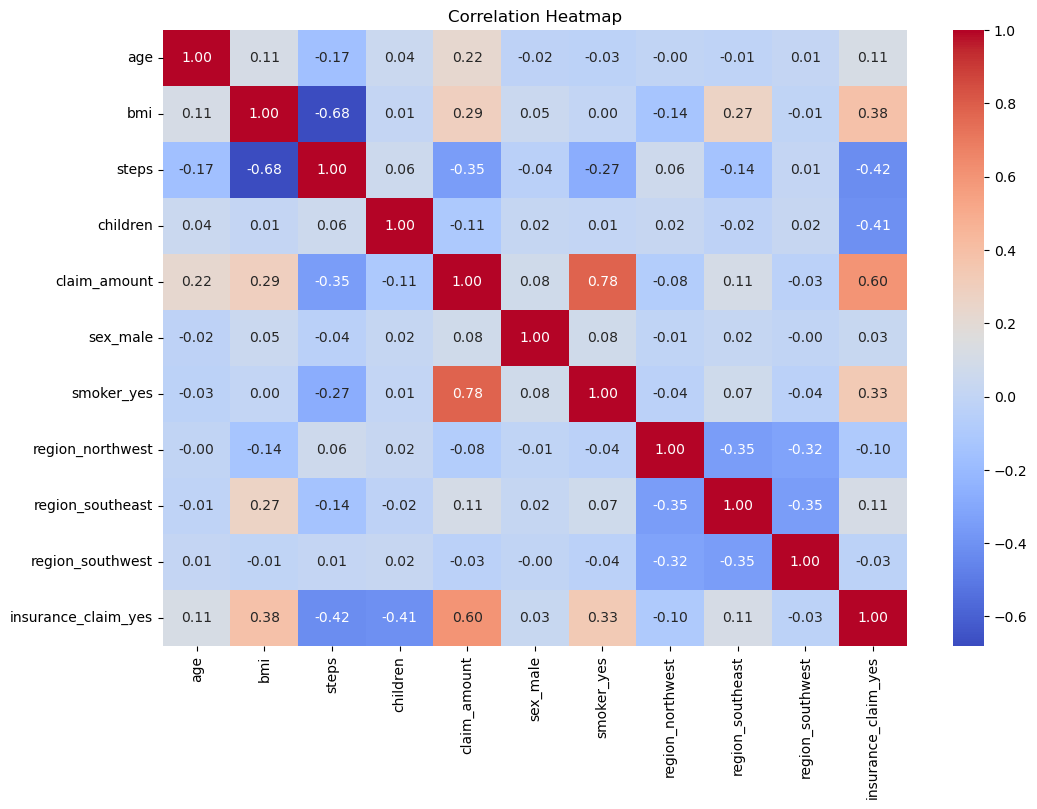

In [7]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.get_dummies(df, drop_first=True).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### NOTES
It is evident that the claim amount, steps, number of children, bmi and whether an individual is a smoker have high correlation with whether an insurance claim is given. No of steps and children have a negative correlation with our target variable meaning the higher their values, the less likely it is claim insurance.

## Model Building and Evaluation
### Model Selection and Training

In [8]:
y = df['insurance_claim']
X = df.drop(['insurance_claim', 'claim_amount'], axis=1)

# Transform the target features into binary
y_transformed = LabelEncoder().fit_transform(y)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.33, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Building and Evaluation
### Model Selection and Training

In [9]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Classification Report': class_report, 'Confusion Matrix': conf_matrix}
    print(f'{name} - Accuracy: {accuracy}')
    print(f'Classification Report:\n{class_report}')
    print(f'Confusion Matrix:\n{conf_matrix}')

Logistic Regression - Accuracy: 0.8733031674208145
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       181
           1       0.90      0.88      0.89       261

    accuracy                           0.87       442
   macro avg       0.87      0.87      0.87       442
weighted avg       0.87      0.87      0.87       442

Confusion Matrix:
[[156  25]
 [ 31 230]]
Decision Tree - Accuracy: 0.9411764705882353
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       181
           1       0.96      0.94      0.95       261

    accuracy                           0.94       442
   macro avg       0.94      0.94      0.94       442
weighted avg       0.94      0.94      0.94       442

Confusion Matrix:
[[171  10]
 [ 16 245]]
Random Forest - Accuracy: 0.9660633484162896
Classification Report:
              precision    recall  f1-score   support


### Model Evaluation

Model: Logistic Regression
Accuracy: 0.8733031674208145
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       181
           1       0.90      0.88      0.89       261

    accuracy                           0.87       442
   macro avg       0.87      0.87      0.87       442
weighted avg       0.87      0.87      0.87       442

Confusion Matrix:


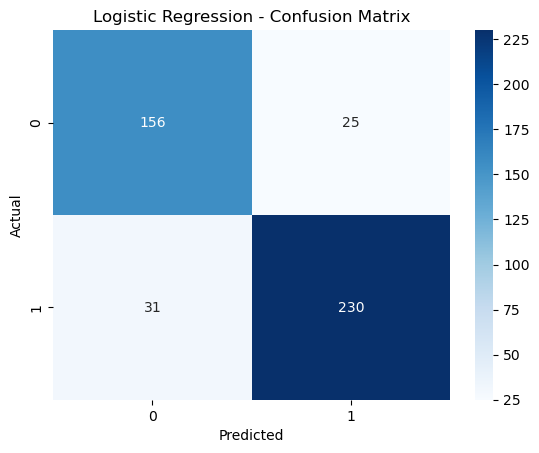

Model: Decision Tree
Accuracy: 0.9411764705882353
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       181
           1       0.96      0.94      0.95       261

    accuracy                           0.94       442
   macro avg       0.94      0.94      0.94       442
weighted avg       0.94      0.94      0.94       442

Confusion Matrix:


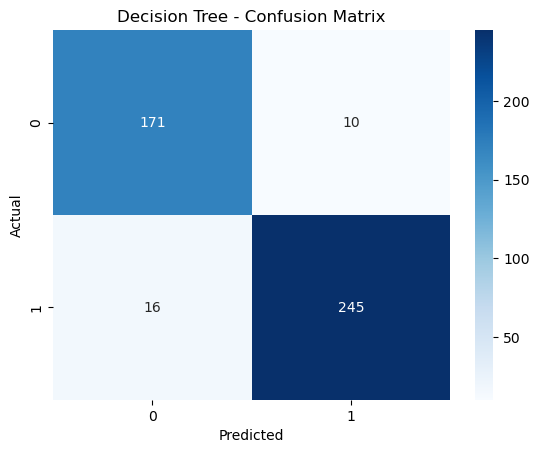

Model: Random Forest
Accuracy: 0.9660633484162896
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       181
           1       0.98      0.96      0.97       261

    accuracy                           0.97       442
   macro avg       0.96      0.97      0.97       442
weighted avg       0.97      0.97      0.97       442

Confusion Matrix:


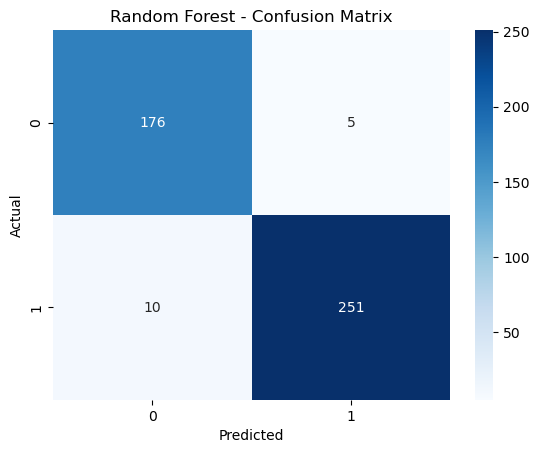

In [10]:
# Compare the performance of different models
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("Confusion Matrix:")
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Results and Discussion

### Discussion of Results

#### Logistic Regression

**Discussion**:  
Logistic regression is a linear model, and its accuracy of 0.873 indicates it performs reasonably well in distinguishing whether a claim was given or not. The model's performance can be improved by feature engineering, adding more relevant features, or using non-linear models. It provides a good baseline for comparison with more complex models.

#### Decision Tree

**Discussion**:  
The decision tree model shows a significant improvement over logistic regression, with an accuracy of 0.948. We can see fewer false negatives and false positives. Decision trees can capture non-linear relationships and interactions between features, which likely contributed to the improved performance. However, decision trees are prone to overfitting, especially with complex datasets. This might explain the high accuracy on the test set, and further evaluation on unseen data is necessary to confirm the model's generalization ability.

#### Random Forest

**Discussion**:  
The random forest model outperforms both logistic regression and decision tree models, achieving an accuracy of 0.966. Here, There is a general increment in accuracy as we see a reduction in false negatives and false positives. Random forests, being an ensemble of decision trees, reduce overfitting by averaging multiple decision trees trained on different parts of the data. This results in a more robust and generalized model. The high accuracy suggests that the random forest effectively captures the underlying patterns in the data, making it a strong candidate for deployment.

### Comparison and Insights
- **Model Performance**: All three models performed well, but the ensemble methods (decision tree and random forest) significantly outperformed the logistic regression model. This highlights the benefit of using more complex models for classification tasks with non-linear relationships.  
- **Overfitting Concerns**: The decision tree model, while accurate, may be overfitting the training data. Random forest mitigates this risk by aggregating multiple decision trees, providing a balance between bias and variance.  


### Final Remarks
The random forest model stands out as the best performer in this analysis, offering a highly accurate classification of insurance claims. Its robustness and ability to generalize well make it a suitable choice for deployment in a production environment. Further improvements and validations are recommended to ensure the model's reliability and effectiveness in real-world scenarios.

Gradient Boosting - Accuracy: 0.9728506787330317
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       181
           1       0.99      0.96      0.98       261

    accuracy                           0.97       442
   macro avg       0.97      0.98      0.97       442
weighted avg       0.97      0.97      0.97       442

Confusion Matrix:
[[179   2]
 [ 10 251]]


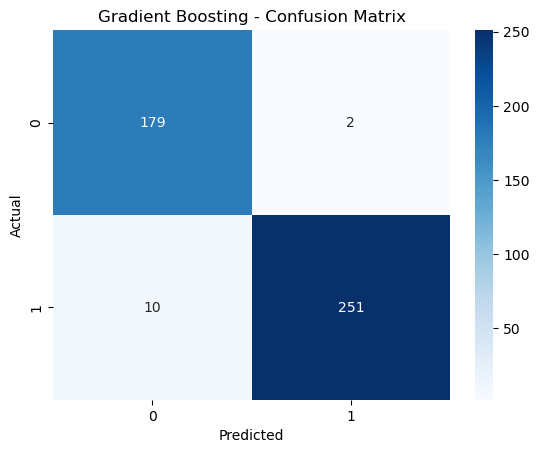

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print(f'Gradient Boosting - Accuracy: {accuracy_gb}')
print(f'Classification Report:\n{class_report_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')

sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Final Remarks:
The Gradient Boosting model outperforms the Logistic Regression, Decision Tree, and Random Forest models, achieving the highest accuracy of 0.973. It shows improvement in that there are fewer false negatives than all other models. It demonstrates superior performance in precision, recall, and F1-score for both classes, making it a highly effective model for classifying insurance claims.